In [1]:
import pyLDAvis
import pyLDAvis.sklearn

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from glob import glob

import matplotlib.pyplot as plt
import numpy
import seaborn

In [2]:
def files_using_word(filenames, word):
    files_with_word = []
    for filename in filenames:
        if word_in_file(word, filename):
            files_with_word.append(filename)
    return files_with_word

def word_in_file(word, filename):
    with open(filename) as f:
        contents = f.read().lower()
        return (word in contents)


In [3]:
pyLDAvis.enable_notebook()

In [4]:
# raw_texts: the actual text of the files
# filenames: a list of filenames

FILE_PATTERN = 'zero-carbon-bill/input/*.json'

filenames = glob(FILE_PATTERN)

print("We have {num} files to read".format(num=len(filenames)))

We have 599 files to read


In [5]:
# Converts the documents into a matrix of features
# features are interesting words
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

# vectorizer = TfidfVectorizer(strip_accents = 'unicode',
#                                 stop_words = 'english',
#                                 lowercase = True,
#                                 token_pattern = r'\b[a-zA-Zā]{3,}\b',
#                                 max_df = 0.5, 
#                                 min_df = 2,
#                                 input = 'filename')

vectorizer =  CountVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Zā]{3,}\b',
                                max_df = 0.5, 
                                min_df = 2,
                                input = 'filename')

# this is a DTM - document-term matrix
vectorized_data = vectorizer.fit_transform(filenames)


In [6]:
shape = vectorized_data.shape
print("There are {} groups from {} words".format(shape[0], shape[1]))

There are 599 groups from 2468 words


In [7]:
lda = LatentDirichletAllocation(n_components=10, random_state=0)
lda.fit(vectorized_data)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=10, n_jobs=None,
                          perp_tol=0.1, random_state=0, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [8]:
print("We have {} samples".format(lda.total_samples))


We have 1000000.0 samples


In [15]:
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        topic_words = [words[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
        print(" ".join(topic_words))
        
# Tweak the two parameters below
number_of_topics = 5
number_of_words = 10

print_topics(lda, vectorizer, number_of_words)


Topic #0:
new emissions zealand carbon government economy transition need future change

Topic #1:
change climate government need new zealand just batteries policy action

Topic #2:
carbon cars electric com http html incentives tax power use

Topic #3:
carbon climate change emissions support new zealand farming zero global

Topic #4:
need change emissions energy make like new carbon electric public

Topic #5:
climate change new future global need emissions zero zealand years

Topic #6:
climate change carbon emissions new years energy need world zealand

Topic #7:
change emissions climate carbon zero time net need agriculture government

Topic #8:
need government needs world carbon emissions change trees make soil

Topic #9:
emissions needs change new government climate targets need environment agriculture


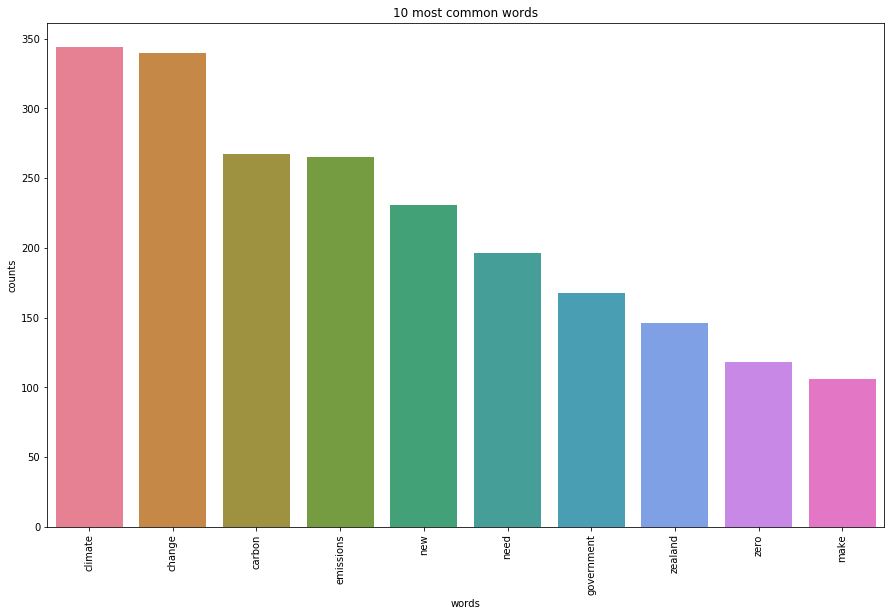

In [10]:
def plot_10_most_common_words(count_data, count_vectorizer):
    words = count_vectorizer.get_feature_names()
    total_counts = numpy.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = numpy.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    seaborn.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    seaborn.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()

count_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Zā]{3,}\b',
                                max_df = 0.5, 
                                min_df = 2,
                                input = 'filename')


# Visualise the 10 most common words
plot_10_most_common_words(vectorized_data, vectorizer)


In [11]:
# NOTE: This step takes a long while to return
prepared_data = pyLDAvis.sklearn.prepare(lda, vectorized_data, vectorizer)
prepared_data

/home/brenda/.pyenv/versions/3.7.4/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6     -0.037779 -0.065281       1        1  19.368115
0      0.019605 -0.005995       2        1  17.498442
3     -0.053783  0.026437       3        1  11.120056
7     -0.047632 -0.017337       4        1  10.207062
4      0.076262  0.032902       5        1   9.813800
8      0.014437  0.110912       6        1   8.700812
5     -0.086486 -0.127463       7        1   8.050033
2      0.193024 -0.065404       8        1   5.839388
9     -0.026693  0.057921       9        1   5.462170
1     -0.050954  0.053307      10        1   3.940123, topic_info=     Category        Freq        Term       Total  loglift  logprob
340   Default  309.000000     climate  309.000000  30.0000  30.0000
306   Default  304.000000      change  304.000000  29.0000  29.0000
941   Default  149.000000  government  149.000000  28.0000  28.0000
286   Default   43.000000        cars   43.000000  27.0000  27.0000
281   Default  241.000000      carbon  241.000000  26.0000  26.0000
...       ...         ...         ...         ...      ...      ...
930   Topic10    4.696940      global   72.601816   0.4959  -5.1598
904   Topic10    4.094596      future   87.059927   0.1770  -5.2970
2206  Topic10    3.542294         tax   36.059426   0.9136  -5.4419
1914  Topic10    3.291581        risk   26.873108   1.1342  -5.5153
680   Topic10    3.996784   emissions  239.518567  -0.8592  -5.3212

[741 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
1         1  0.115559  able
1         2  0.154079  able
1         3  0.154079  able
1         5  0.308157  able
1         6  0.077039  able
...     ...       ...   ...
2467      5  0.018738  zero
2467      6  0.037477  zero
2467      7  0.103060  zero
2467      8  0.056215  zero
2467     10  0.018738  zero

[1929 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 1, 4, 8, 5, 9, 6, 3, 10, 2])